In [1]:
import numpy as np
import ray
import matplotlib.pyplot as plt
import time
from utils import *
from procedures import *

plt.rcParams["font.sans-serif"] = "DejaVu Sans"
plt.rcParams["mathtext.default"]  = "it"
plt.rcParams["mathtext.fontset"]  = "dejavusans"

In [2]:
# Number of parallel threads to be used
# Shut down any existing Ray processes
# Initialize Ray with the specified number of parallel threads


num_cpus=96
ray.shutdown()
ray.init(num_cpus=num_cpus, ignore_reinit_error=True)

2023-12-21 20:39:57,706	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Python version:,3.8.15
Ray version:,2.2.0
Dashboard:,http://127.0.0.1:8265


In [3]:
seed = 20221209
np.random.seed(seed)
n_replications =1000


# problem size k=2**l. l = min_power,..., max_power
min_power = 2
max_power = 16
base = 2

# parameters of the problem configuration
gamma = 0.1
var = 1
lamda = -1
varlow = 1
varhigh = 2

rng = np.random.default_rng(seed)

In [4]:
OCBA_results = []

for power in np.arange(min_power, max_power+1):
    
    print("This problem has {} alternatives".format(base**power))
    SCCVgenerators =  [SCCVGenerator(base**power, gamma, var) for i in range(n_replications)]
    EMCVgenerators =   [EMCVGenerator(base**power, gamma, lamda, var) for i in range(n_replications)]
    EMIVgenerators =  [EMIVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    EMDVgenerators =  [EMDVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    
    generator_types = [SCCVgenerators, EMCVgenerators,  EMIVgenerators, EMDVgenerators]
    for i, generators in enumerate(generator_types):
        print("----------------------------------Generator Type {}--------------------------------".format(i))
        n = 100
        print("OCBA")
        PCS, PGS = parallel_experiments(rng,  generators, policy=OCBA, remote_policy=remote_OCBA,  args={"n":n})
        OCBA_results.append(PCS)
OCBA_results

# the results of OCBA procedure are not used in the Figure 3. However, to reproduce all the following results, you should 
# run this block first.

This problem has 4 alternatives
----------------------------------Generator Type 0--------------------------------
OCBA
--------New experiments with  k=4----------------------
Start to simulate... at Thu Dec 21 20:40:17 2023
PCS:0.527, PGS:0.527
Total time used: 1.5962533950805664s, simulation ends at Thu Dec 21 20:40:18 2023
----------------------------------Generator Type 1--------------------------------
OCBA
--------New experiments with  k=4----------------------
Start to simulate... at Thu Dec 21 20:40:18 2023
PCS:1.0, PGS:1.0
Total time used: 0.5567872524261475s, simulation ends at Thu Dec 21 20:40:18 2023
----------------------------------Generator Type 2--------------------------------
OCBA
--------New experiments with  k=4----------------------
Start to simulate... at Thu Dec 21 20:40:19 2023
PCS:0.995, PGS:0.995
Total time used: 0.570439338684082s, simulation ends at Thu Dec 21 20:40:19 2023
----------------------------------Generator Type 3--------------------------------
OC

Start to simulate... at Thu Dec 21 20:40:33 2023
PCS:0.112, PGS:0.112
Total time used: 0.5977427959442139s, simulation ends at Thu Dec 21 20:40:33 2023
This problem has 512 alternatives
----------------------------------Generator Type 0--------------------------------
OCBA
--------New experiments with  k=512----------------------
Start to simulate... at Thu Dec 21 20:40:34 2023
PCS:0.0, PGS:0.0
Total time used: 0.617243766784668s, simulation ends at Thu Dec 21 20:40:34 2023
----------------------------------Generator Type 1--------------------------------
OCBA
--------New experiments with  k=512----------------------
Start to simulate... at Thu Dec 21 20:40:34 2023
PCS:0.733, PGS:0.733
Total time used: 0.5909161567687988s, simulation ends at Thu Dec 21 20:40:34 2023
----------------------------------Generator Type 2--------------------------------
OCBA
--------New experiments with  k=512----------------------
Start to simulate... at Thu Dec 21 20:40:35 2023
PCS:0.495, PGS:0.495
Total t

Start to simulate... at Thu Dec 21 20:41:25 2023
PCS:0.0, PGS:0.0
Total time used: 6.513081789016724s, simulation ends at Thu Dec 21 20:41:30 2023
----------------------------------Generator Type 3--------------------------------
OCBA
--------New experiments with  k=32768----------------------
Start to simulate... at Thu Dec 21 20:41:32 2023
PCS:0.0, PGS:0.0
Total time used: 6.711216926574707s, simulation ends at Thu Dec 21 20:41:37 2023
This problem has 65536 alternatives
----------------------------------Generator Type 0--------------------------------
OCBA
--------New experiments with  k=65536----------------------
Start to simulate... at Thu Dec 21 20:41:45 2023
PCS:0.0, PGS:0.0
Total time used: 12.799282312393188s, simulation ends at Thu Dec 21 20:41:55 2023
----------------------------------Generator Type 1--------------------------------
OCBA
--------New experiments with  k=65536----------------------
Start to simulate... at Thu Dec 21 20:41:57 2023
PCS:0.0, PGS:0.0
Total time u

[0.527,
 1.0,
 0.995,
 0.988,
 0.335,
 0.99,
 0.989,
 0.942,
 0.14,
 0.978,
 0.961,
 0.85,
 0.035,
 0.964,
 0.921,
 0.705,
 0.006,
 0.932,
 0.847,
 0.49,
 0.0,
 0.873,
 0.769,
 0.298,
 0.0,
 0.809,
 0.654,
 0.112,
 0.0,
 0.733,
 0.495,
 0.017,
 0.0,
 0.532,
 0.237,
 0.002,
 0.0,
 0.354,
 0.104,
 0.0,
 0.0,
 0.142,
 0.012,
 0.0,
 0.0,
 0.027,
 0.004,
 0.0,
 0.0,
 0.002,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [5]:
EA_results = []
for power in np.arange(min_power, max_power+1):
    
    print("This problem has {} alternatives".format(base**power))
    # generate problem instance for k = 2**power per each replication
    SCCVgenerators =  [SCCVGenerator(base**power, gamma, var) for i in range(n_replications)]
    EMCVgenerators =   [EMCVGenerator(base**power, gamma, lamda, var) for i in range(n_replications)]
    EMIVgenerators =  [EMIVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    EMDVgenerators =  [EMDVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    
    generator_types = [SCCVgenerators, EMCVgenerators,  EMIVgenerators, EMDVgenerators]
    
    for i, generators in enumerate(generator_types):
        print("----------------------------------Generator Type {}--------------------------------".format(i))
        n0 = 100
        ng = 0
        # the total sampling budget is set as N=100*k
        # Setting ng=0 in EFG procedure => EA procedure
        print("EA")
        # finish the experiments and then estimate the PCS (or PGS) for k
        PCS, PGS = parallel_experiments(rng,  generators, policy=EFG, remote_policy=remote_EFG,  args={"n0":n0, "ng":ng})
        EA_results.append(PCS)
EA_results

This problem has 4 alternatives
----------------------------------Generator Type 0--------------------------------
EA
--------New experiments with  k=4----------------------
Start to simulate... at Thu Dec 21 20:42:43 2023
PCS:0.568, PGS:0.568
Total time used: 0.5587379932403564s, simulation ends at Thu Dec 21 20:42:43 2023
----------------------------------Generator Type 1--------------------------------
EA
--------New experiments with  k=4----------------------
Start to simulate... at Thu Dec 21 20:42:44 2023
PCS:0.992, PGS:0.992
Total time used: 0.6338207721710205s, simulation ends at Thu Dec 21 20:42:44 2023
----------------------------------Generator Type 2--------------------------------
EA
--------New experiments with  k=4----------------------
Start to simulate... at Thu Dec 21 20:42:44 2023
PCS:0.991, PGS:0.991
Total time used: 0.5704386234283447s, simulation ends at Thu Dec 21 20:42:44 2023
----------------------------------Generator Type 3--------------------------------
EA


Start to simulate... at Thu Dec 21 20:42:59 2023
PCS:0.197, PGS:0.197
Total time used: 0.6133439540863037s, simulation ends at Thu Dec 21 20:42:59 2023
This problem has 512 alternatives
----------------------------------Generator Type 0--------------------------------
EA
--------New experiments with  k=512----------------------
Start to simulate... at Thu Dec 21 20:43:00 2023
PCS:0.03, PGS:0.03
Total time used: 0.8073906898498535s, simulation ends at Thu Dec 21 20:43:00 2023
----------------------------------Generator Type 1--------------------------------
EA
--------New experiments with  k=512----------------------
Start to simulate... at Thu Dec 21 20:43:01 2023
PCS:0.233, PGS:0.233
Total time used: 0.7469339370727539s, simulation ends at Thu Dec 21 20:43:01 2023
----------------------------------Generator Type 2--------------------------------
EA
--------New experiments with  k=512----------------------
Start to simulate... at Thu Dec 21 20:43:02 2023
PCS:0.205, PGS:0.205
Total time

Start to simulate... at Thu Dec 21 20:44:00 2023
PCS:0.015, PGS:0.015
Total time used: 6.154888868331909s, simulation ends at Thu Dec 21 20:44:05 2023
----------------------------------Generator Type 3--------------------------------
EA
--------New experiments with  k=32768----------------------
Start to simulate... at Thu Dec 21 20:44:06 2023
PCS:0.006, PGS:0.006
Total time used: 6.19584321975708s, simulation ends at Thu Dec 21 20:44:11 2023
This problem has 65536 alternatives
----------------------------------Generator Type 0--------------------------------
EA
--------New experiments with  k=65536----------------------
Start to simulate... at Thu Dec 21 20:44:19 2023
PCS:0.001, PGS:0.001
Total time used: 12.409238815307617s, simulation ends at Thu Dec 21 20:44:30 2023
----------------------------------Generator Type 1--------------------------------
EA
--------New experiments with  k=65536----------------------
Start to simulate... at Thu Dec 21 20:44:32 2023
PCS:0.01, PGS:0.01
Total

[0.568,
 0.992,
 0.991,
 0.966,
 0.395,
 0.927,
 0.929,
 0.858,
 0.271,
 0.849,
 0.829,
 0.702,
 0.188,
 0.693,
 0.733,
 0.528,
 0.121,
 0.534,
 0.519,
 0.399,
 0.07,
 0.409,
 0.415,
 0.282,
 0.06,
 0.311,
 0.294,
 0.197,
 0.03,
 0.233,
 0.205,
 0.12,
 0.013,
 0.146,
 0.129,
 0.077,
 0.009,
 0.104,
 0.095,
 0.039,
 0.005,
 0.062,
 0.061,
 0.04,
 0.004,
 0.044,
 0.031,
 0.023,
 0.004,
 0.028,
 0.025,
 0.012,
 0.001,
 0.013,
 0.015,
 0.006,
 0.001,
 0.01,
 0.011,
 0.005]

In [6]:
EFG_results = []
for power in np.arange(min_power, max_power+1):
    print("This problem has {} alternatives".format(base**power))
    SCCVgenerators =  [SCCVGenerator(base**power, gamma, var) for i in range(n_replications)]
    EMCVgenerators =   [EMCVGenerator(base**power, gamma, lamda, var) for i in range(n_replications)]
    EMIVgenerators =  [EMIVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    EMDVgenerators =  [EMDVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    
    generator_types = [SCCVgenerators, EMCVgenerators,  EMIVgenerators, EMDVgenerators]
    
    for i, generators in enumerate(generator_types):
        print("----------------------------------Generator Type {}--------------------------------".format(i))
        n0 = 80
        ng = 20
        print("EFG")
        PCS, PGS = parallel_experiments(rng, generators, policy=EFG, remote_policy=remote_EFG, args={"n0":n0, "ng":ng})
        EFG_results.append(PCS)
EFG_results

This problem has 4 alternatives
----------------------------------Generator Type 0--------------------------------
EFG
--------New experiments with  k=4----------------------
Start to simulate... at Fri Dec  9 14:28:28 2022
PCS:0.574, PGS:0.574
Total time used: 0.6493594646453857s, simulation ends at Fri Dec  9 14:28:28 2022
----------------------------------Generator Type 1--------------------------------
EFG
--------New experiments with  k=4----------------------
Start to simulate... at Fri Dec  9 14:28:28 2022
PCS:0.998, PGS:0.998
Total time used: 0.5957772731781006s, simulation ends at Fri Dec  9 14:28:28 2022
----------------------------------Generator Type 2--------------------------------
EFG
--------New experiments with  k=4----------------------
Start to simulate... at Fri Dec  9 14:28:29 2022
PCS:0.997, PGS:0.997
Total time used: 0.6240496635437012s, simulation ends at Fri Dec  9 14:28:29 2022
----------------------------------Generator Type 3--------------------------------


Start to simulate... at Fri Dec  9 14:28:49 2022
PCS:0.586, PGS:0.586
Total time used: 1.4460492134094238s, simulation ends at Fri Dec  9 14:28:49 2022
This problem has 512 alternatives
----------------------------------Generator Type 0--------------------------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Fri Dec  9 14:28:50 2022
PCS:0.166, PGS:0.166
Total time used: 2.880396604537964s, simulation ends at Fri Dec  9 14:28:52 2022
----------------------------------Generator Type 1--------------------------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Fri Dec  9 14:28:53 2022
PCS:0.692, PGS:0.692
Total time used: 2.818324565887451s, simulation ends at Fri Dec  9 14:28:55 2022
----------------------------------Generator Type 2--------------------------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Fri Dec  9 14:28:56 2022
PCS:0.728, PGS:0.728
Total t

Start to simulate... at Fri Dec  9 15:03:45 2022
PCS:0.653, PGS:0.653
Total time used: 488.3600459098816s, simulation ends at Fri Dec  9 15:11:51 2022
----------------------------------Generator Type 3--------------------------------
EFG
--------New experiments with  k=32768----------------------
Start to simulate... at Fri Dec  9 15:11:53 2022
PCS:0.491, PGS:0.491
Total time used: 488.62136721611023s, simulation ends at Fri Dec  9 15:20:00 2022
This problem has 65536 alternatives
----------------------------------Generator Type 0--------------------------------
EFG
--------New experiments with  k=65536----------------------
Start to simulate... at Fri Dec  9 15:20:13 2022
PCS:0.195, PGS:0.195
Total time used: 1771.9380118846893s, simulation ends at Fri Dec  9 15:49:43 2022
----------------------------------Generator Type 1--------------------------------
EFG
--------New experiments with  k=65536----------------------
Start to simulate... at Fri Dec  9 15:49:44 2022
PCS:0.655, PGS:0.65

[0.574,
 0.998,
 0.997,
 0.965,
 0.445,
 0.977,
 0.975,
 0.893,
 0.343,
 0.919,
 0.909,
 0.796,
 0.268,
 0.849,
 0.868,
 0.701,
 0.199,
 0.808,
 0.804,
 0.635,
 0.207,
 0.774,
 0.772,
 0.608,
 0.192,
 0.741,
 0.732,
 0.586,
 0.166,
 0.692,
 0.728,
 0.53,
 0.165,
 0.682,
 0.68,
 0.531,
 0.202,
 0.687,
 0.676,
 0.514,
 0.176,
 0.686,
 0.65,
 0.51,
 0.194,
 0.658,
 0.658,
 0.485,
 0.201,
 0.646,
 0.648,
 0.499,
 0.171,
 0.633,
 0.653,
 0.491,
 0.195,
 0.655,
 0.647,
 0.49]

In [ ]:
EA_results, EFG_results


In [7]:
# results drawn from the above experiments and Figure_3-Greedy.ipynb for producing the Figure 3
Greedy_results = [0.368,
 0.681,
 0.659,
 0.574,
 0.253,
 0.552,
 0.565,
 0.432,
 0.188,
 0.46,
 0.436,
 0.327,
 0.128,
 0.386,
 0.353,
 0.29,
 0.122,
 0.295,
 0.29,
 0.227,
 0.134,
 0.256,
 0.262,
 0.198,
 0.132,
 0.179,
 0.208,
 0.173,
 0.125,
 0.185,
 0.184,
 0.152,
 0.097,
 0.187,
 0.176,
 0.122,
 0.11,
 0.162,
 0.161,
 0.122,
 0.126,
 0.147,
 0.138,
 0.104,
 0.115,
 0.154,
 0.148,
 0.114,
 0.126,
 0.134,
 0.138,
 0.094,
 0.129,
 0.137,
 0.129,
 0.103,
 0.119,
 0.146,
 0.127,
 0.107]


# EA_results = [0.568,
#  0.992,
#  0.991,
#  0.966,
#  0.395,
#  0.927,
#  0.929,
#  0.858,
#  0.271,
#  0.849,
#  0.829,
#  0.702,
#  0.188,
#  0.693,
#  0.733,
#  0.528,
#  0.121,
#  0.534,
#  0.519,
#  0.399,
#  0.07,
#  0.409,
#  0.415,
#  0.282,
#  0.06,
#  0.311,
#  0.294,
#  0.197,
#  0.03,
#  0.233,
#  0.205,
#  0.12,
#  0.013,
#  0.146,
#  0.129,
#  0.077,
#  0.009,
#  0.104,
#  0.095,
#  0.039,
#  0.005,
#  0.062,
#  0.061,
#  0.04,
#  0.004,
#  0.044,
#  0.031,
#  0.023,
#  0.004,
#  0.028,
#  0.025,
#  0.012,
#  0.001,
#  0.013,
#  0.015,
#  0.006,
#  0.001,
#  0.01,
#  0.011,
#  0.005]


# EFG_results = [0.574,
#  0.998,
#  0.997,
#  0.965,
#  0.445,
#  0.977,
#  0.975,
#  0.893,
#  0.343,
#  0.919,
#  0.909,
#  0.796,
#  0.268,
#  0.849,
#  0.868,
#  0.701,
#  0.199,
#  0.808,
#  0.804,
#  0.635,
#  0.207,
#  0.774,
#  0.772,
#  0.608,
#  0.192,
#  0.741,
#  0.732,
#  0.586,
#  0.166,
#  0.692,
#  0.728,
#  0.53,
#  0.165,
#  0.682,
#  0.68,
#  0.531,
#  0.202,
#  0.687,
#  0.676,
#  0.514,
#  0.176,
#  0.686,
#  0.65,
#  0.51,
#  0.194,
#  0.658,
#  0.658,
#  0.485,
#  0.201,
#  0.646,
#  0.648,
#  0.499,
#  0.171,
#  0.633,
#  0.653,
#  0.491,
#  0.195,
#  0.655,
#  0.647,
#  0.49]

In [8]:
PCS_collection = [Greedy_results, EA_results,  EFG_results]
procedure_labels = ["Greedy","EA", "EFG"]

for i, _list in enumerate(PCS_collection):
    PCS_collection[i] =  np.array(_list).reshape( -1, 4).T

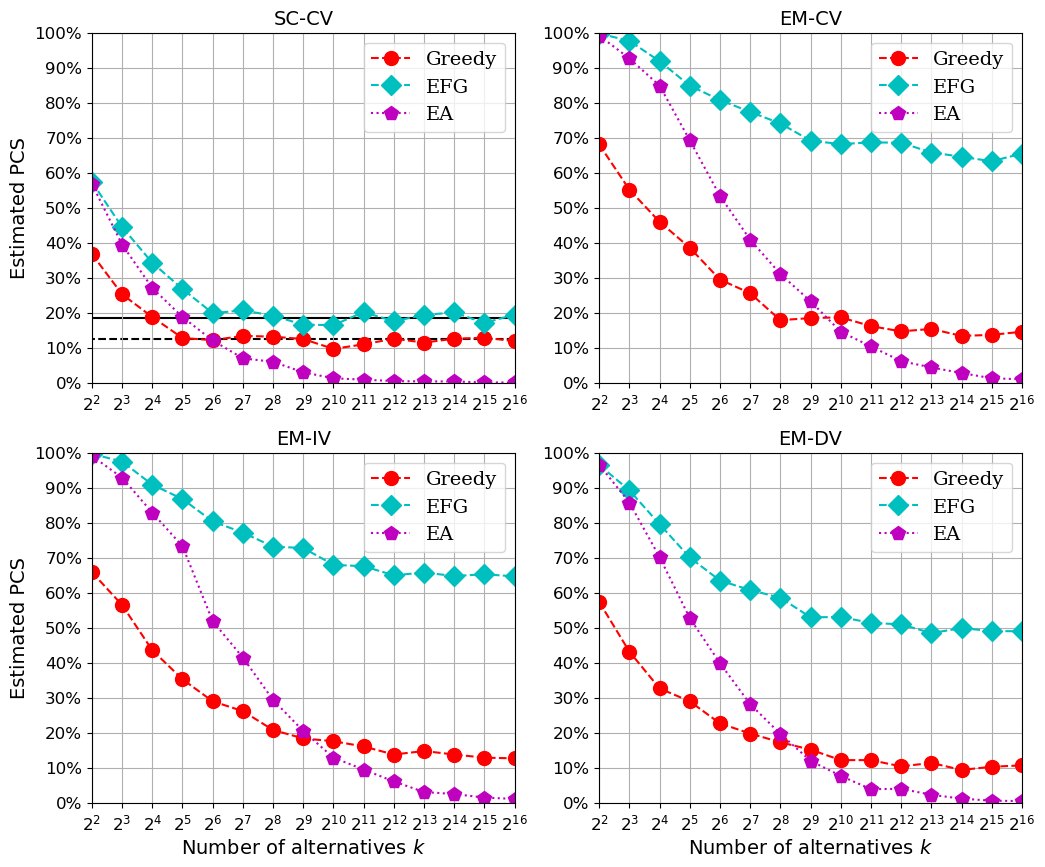

In [9]:
powers = np.arange(min_power, max_power+1)

fontsize= 14
_colors = [ "r" ,  "m","c", "k"]
_markers = ["o", "p", "D", "s"]
_line_styles = ["--", ":","--", "-."]

fig = plt.figure(figsize=(12, 10))


fig_plots = [(2, 2, 1), (2, 2, 2), (2, 2, 3), (2,2, 4)]

titles = ["SC-CV", "EM-CV", "EM-IV", "EM-DV"]


selected = [0, 2, 1]
labels = [procedure_labels[i] for i in selected]
colors = [_colors[i] for i in selected]
markers = [_markers[i] for i in selected]
line_styles = [_line_styles[i] for i in selected]


merged_results = [[], [], [], []]
for i in range(4):
    for k in selected:
        merged_results[i].append(PCS_collection[k][i])

for i, fig_plot in enumerate(fig_plots):
    
    ax = fig.add_subplot(*fig_plots[i])
    
    results = merged_results[i]

    for j, result in enumerate(results):
        plt.plot(powers, result, line_styles[j], markersize=10, color=colors[j], marker=markers[j], label=labels[j])

    plt.xlim(min_power, max_power)
    xticks = powers
    xticklabels = ["2^{"+str(power)+"}" for power in xticks]
    xticklabels = ["$"+power_label+"$" for power_label in xticklabels]
    plt.xticks(xticks, xticklabels, fontsize=fontsize-2)
    
    if i == 0:
        # estimated true PCS according to Theorem 2 & 3
        pcs = 0.124
        ax.plot([0, max_power+1], [pcs, pcs], "--", color="k", zorder=0) # line_styles[i], color=colors[i], 

    if i == 0:
        pcs = 0.185
        ax.plot([0, max_power+1], [pcs, pcs], "-", color="k", zorder=0) # line_styles[i], color=colors[i], 
        
    plt.ylim(0.0, 1)
    yticks = np.arange(0.0, 1+0.1, 0.1)
    yticklabels = ["%.0f"%(tick*100)+"%" for tick in yticks]
    plt.yticks(yticks, yticklabels, fontsize=fontsize-2)

    ax.legend(prop={'family': 'serif',"size":fontsize})
    if i == 2 or i == 3:
        ax.set_xlabel("Number of alternatives $k$", size=fontsize)
    if i == 0 or i == 2:
        ax.set_ylabel("Estimated PCS", size=fontsize)
    plt.title(titles[i], fontsize=fontsize)
    plt.grid(0.1)

plt.show()

fig.savefig("Figure_3.pdf", bbox_inches='tight')